# <u><b> Objective </b></u>
## <b> You are given a data of US Airline tweets and their sentiment. The task is to do sentiment analysis about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service"). </b>

<br>
<br>

## <b>Things to do :</b>
* ### Read the tweets.csv data, clean and tokenize the tweets using nltk library.
* ### Count vectorize the tweets so that you end up with a sparse matrix (which will be your $X$). 
* ### You are supposed to build a SVM classifier (a binary classification in fact). Since the data contains three levels of sentiment(positive, negative and neutral), you should remove the sentences which are neutral. Once you do that you will have two classes only (positive and negative). You can set the label of positive tweets to 1 and negative tweets to 0.
* ### Once you have built the SVM classifier, evaluate this model across various metrics. Also plot the ROC curve and Precision-Recall curve. Report the areas under these two curves along with other metrics.
* ### Perform GridSearch cross validation for various values of $C$ and $gamma$. These will be the hyperparameters which you would play around with.
* ### Explain your observations and the underlying reasons for these.
* ### Try checking if <code>tfidfvectorizer</code> helps you gain lift in model's performance.





In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read the tweets.csv data, clean and tokenize the tweets using nltk library.

In [3]:
# path = 'E:/Data Science/amlabetter/Module 4/Week 3/Day 3/Tweets.csv'
path = '/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Module 4/Week 3/Day 3/Tweets.csv'
tweets = pd.read_csv(path)
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
tweets.shape

(14640, 15)

In [5]:
tweets.groupby('airline_sentiment')['airline_sentiment'].describe()

,count,unique,top,freq
airline_sentiment,,,,
negative,9178,1,negative,9178
neutral,3099,1,neutral,3099
positive,2363,1,positive,2363


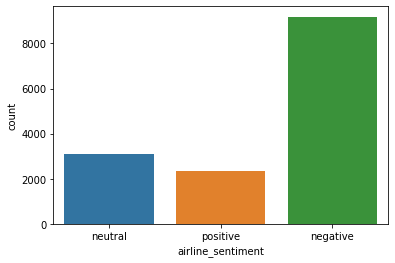

In [6]:
sns.countplot(x = tweets['airline_sentiment'])

In [7]:
tweets.describe( include = 'all')

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,1.464000e+04,14640,14640.000000,9178,10522.000000,14640,40,14640,32,14640.000000,14640,1019,14640,9907,9820
unique,NaN,3,NaN,10,NaN,6,3,7701,13,NaN,14427,832,14247,3081,85
top,NaN,negative,NaN,Customer Service Issue,NaN,United,negative,JetBlueNews,Customer Service Issue,NaN,@united thanks,"[0.0, 0.0]",2015-02-24 09:54:34 -0800,"Boston, MA",Eastern Time (US & Canada)
freq,NaN,9178,NaN,2910,NaN,3822,32,63,12,NaN,6,164,5,157,3744
mean,5.692184e+17,NaN,0.900169,NaN,0.638298,NaN,NaN,NaN,NaN,0.082650,NaN,NaN,NaN,NaN,NaN
std,7.791112e+14,NaN,0.162830,NaN,0.330440,NaN,NaN,NaN,NaN,0.745778,NaN,NaN,NaN,NaN,NaN
min,5.675883e+17,NaN,0.335000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,5.685592e+17,NaN,0.692300,NaN,0.360600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,5.694779e+17,NaN,1.000000,NaN,0.670600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,5.698905e+17,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [8]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [9]:
(tweets.isnull().sum()/len(tweets))*100  ## columns_to_be_dropped = ['airline_sentiment_gold','negativereason_gold','tweet_coord']

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

In [10]:
len(tweets['negativereason'].unique())

11

In [11]:
tweets['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

In [12]:
df = tweets[['airline_sentiment','text']]
df = df[ df['airline_sentiment'] !='neutral' ]

In [13]:
df.airline_sentiment.unique()

array(['positive', 'negative'], dtype=object)

In [14]:
df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [15]:
df.head()

,airline_sentiment,text
1,1,@VirginAmerica plus you've added commercials t...
3,0,@VirginAmerica it's really aggressive to blast...
4,0,@VirginAmerica and it's a really big bad thing...
5,0,@VirginAmerica seriously would pay $30 a fligh...
6,1,"@VirginAmerica yes, nearly every time I fly VX..."


In [16]:
import nltk
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [19]:
def punc_removal(msg):
    "takes string and returns string after removing punctuations"
    non_punc_msg = [ms for ms in msg if ms not in string.punctuation]
    return ''.join(non_punc_msg)

In [20]:
def stopwords_removal(msg):
    "takes string and returns string after removing stopwords"
    non_punc = punc_removal(msg)
    non_stopword_msg = [ms for ms in non_punc.split() if ms.lower() not in stopwords.words('english')]
    return ' '.join(non_stopword_msg)

In [21]:
df['tokenize'] = df['text'].apply(stopwords_removal)

In [22]:
pd.set_option('display.max_colwidth', -1)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,airline_sentiment,text,tokenize
1,1,@VirginAmerica plus you've added commercials to the experience... tacky.,VirginAmerica plus youve added commercials experience tacky
3,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",VirginAmerica really aggressive blast obnoxious entertainment guests faces amp little recourse
4,0,@VirginAmerica and it's a really big bad thing about it,VirginAmerica really big bad thing
5,0,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,VirginAmerica seriously would pay 30 flight seats didnt playing really bad thing flying VA
6,1,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",VirginAmerica yes nearly every time fly VX “ear worm” won’t go away


## Count vectorize the tweets so that you end up with a sparse matrix (which will be your  X)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
vectorizer = TfidfVectorizer(max_df=.9, min_df=10)
X = vectorizer.fit_transform(df['tokenize'])

In [25]:
print(vectorizer.get_feature_names())

['10', '100', '1000', '11', '12', '13', '14', '140', '15', '150', '16', '17', '18', '1800', '1hr', '1k', '1st', '20', '200', '2015', '21', '22', '23', '24', '24hrs', '25', '2day', '2hrs', '2nd', '30', '300', '32', '34', '35', '3hrs', '3rd', '40', '400', '45', '50', '500', '60', '600', '70', '728', '75', '800', '90', 'aa', 'able', 'absolute', 'absolutely', 'absurd', 'accept', 'acceptable', 'access', 'accommodate', 'according', 'account', 'across', 'act', 'actual', 'actually', 'add', 'added', 'adding', 'additional', 'address', 'admirals', 'advise', 'afford', 'afternoon', 'agent', 'agents', 'ago', 'ahead', 'air', 'aircraft', 'airline', 'airlines', 'airplane', 'airport', 'airports', 'airways', 'allow', 'allowed', 'allowing', 'almost', 'alone', 'along', 'already', 'also', 'alternate', 'although', 'always', 'amazing', 'america', 'american', 'americanair', 'americanairlines', 'amount', 'amp', 'angry', 'announcement', 'annoying', 'another', 'answer', 'answered', 'answering', 'answers', 'anymor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
X.toarray().shape

(11541, 1504)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df['tokenize'],df.airline_sentiment,random_state=0,test_size=.2)

In [28]:
x_train.head()

10070    USAirways BritishAirways three hour flight delay phone 45min counting                                              
13072    AmericanAir please something boarding DCA 35X Many delays buses planes tarmac despite empty gates Disorganized mess
1761     united left bag Houston last night freezing cold Memphis idea see tomorrow                                         
3085     united Thank wonderful global first class flight 777 FRA Great service cont httptco46n9kDcsxU                      
7246     JetBlue sloooooow today                                                                                            
Name: tokenize, dtype: object

In [29]:
vectorized_train = vectorizer.transform(x_train)
vectorized_test = vectorizer.transform(x_test)

In [30]:
vectorized_train

<9232x1504 sparse matrix of type '<class 'numpy.float64'>'
	with 78691 stored elements in Compressed Sparse Row format>

In [31]:
vectorized_train.toarray()[5000]

array([0., 0., 0., ..., 0., 0., 0.])

In [32]:
train_array =vectorized_train.toarray()
test_array = vectorized_test.toarray()

## Once you have built the SVM classifier, evaluate this model across various metrics. Also plot the ROC curve and Precision-Recall curve. Report the areas under these two curves along with other metrics.

In [33]:
from sklearn.svm import SVC
sentiment_detector = SVC(kernel='linear')

In [34]:
sentiment_detector.fit(train_array,y_train)

SVC(kernel='linear')

In [35]:
train_preds = sentiment_detector.predict(train_array)
test_preds = sentiment_detector.predict(test_array)

In [36]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve

In [37]:
print(confusion_matrix(y_train, train_preds))
print('\n')
print(confusion_matrix(y_test, test_preds))

[[7215  124]
 [ 413 1480]]


[[1789   50]
 [ 131  339]]


In [38]:
print(classification_report(y_train,train_preds))
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      7339
           1       0.92      0.78      0.85      1893

    accuracy                           0.94      9232
   macro avg       0.93      0.88      0.91      9232
weighted avg       0.94      0.94      0.94      9232

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1839
           1       0.87      0.72      0.79       470

    accuracy                           0.92      2309
   macro avg       0.90      0.85      0.87      2309
weighted avg       0.92      0.92      0.92      2309



In [39]:
# plotting not done

## Perform GridSearch cross validation for various values of  C  and  gamma . These will be the hyperparameters which you would play around with.

In [40]:
from sklearn.svm import SVC
sentiment_detector = SVC()

In [41]:
from sklearn.model_selection import GridSearchCV

pram_grid = { 'C': np.linspace(1e-9,1,3), 'gamma': np.linspace(1e-9,1,3)}

grid_model = GridSearchCV(sentiment_detector,param_grid=pram_grid,verbose=True,cv=3)

In [42]:
grid_model.fit(train_array,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': array([1.00000000e-09, 5.00000001e-01, 1.00000000e+00]),
                         'gamma': array([1.00000000e-09, 5.00000001e-01, 1.00000000e+00])},
             verbose=True)

In [43]:
grid_model.best_params_

{'C': 1.0, 'gamma': 1.0}

## Explain your observations and the underlying reasons for these.

In [44]:
# after applying GridSearch I observed that the model performence is best at C = 1 and gamma = 1

## Try checking if tfidfvectorizer helps you gain lift in model's performance.